In [582]:
 
import numpy as np
import tensorflow as tf
from tensorflow import keras
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from pandas.plotting import register_matplotlib_converters

%matplotlib inline
%config InlineBackend.figure_format='retina'

register_matplotlib_converters()
sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 22, 10

RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)

In [583]:
import pandas as pd
column_names = ['genre', 'acousticness','danceability','energy','liveness','loudness','speechiness', 'tempo',	'valence']
df=pd.read_csv("SpotifyFeatures.csv", usecols=column_names)

genres_to_drop = [
    'Anime', 'Dance', "Children’s Music", 'Movie', 'A Capella', 
    'Soundtrack', 'Opera', 'World', "Children's Music", 'Ska', 'Folk', 'Indie', 'R&B', 'Reggae', 'Alternative', 'Blues', 'Rap', 'Soul', 'Jazz', 'Pop', 'Electronic', 'Country'
]

# Drop rows where genre is in genres_to_drop list
df = df[~df['genre'].isin(genres_to_drop)]
display(list(set(df['genre'])))


['Rock', 'Reggaeton', 'Comedy', 'Hip-Hop', 'Classical']

In [584]:
valid_genres = ['Classical', 'Reggaeton', 'Rock']

# Replace genres that are not in the valid list with a new value
df.loc[~df['genre'].isin(valid_genres), 'genre'] = 'Other'
df.head()

,genre,acousticness,danceability,energy,liveness,loudness,speechiness,tempo,valence
66607,Other,0.14900,0.837,0.364,0.2710,-11.713,0.2760,123.984,0.463
66608,Other,0.25900,0.889,0.496,0.2520,-6.365,0.0905,86.003,0.544
66609,Other,0.03950,0.837,0.636,0.3420,-7.643,0.0860,145.972,0.274
66610,Other,0.00195,0.942,0.383,0.0922,-8.099,0.5650,100.021,0.380
66611,Other,0.19400,0.729,0.625,0.2480,-5.266,0.0315,146.034,0.261


In [585]:
df.shape
display(list(set(df['genre'])))

['Rock', 'Reggaeton', 'Other', 'Classical']

In [586]:
frequencies = pd.DataFrame()
genres = list(set(df['genre']))
repetition = []
for genre in genres:
    repetition.append(len(df[df['genre'] == str(genre)]))
frequencies['Genres'] = genres
frequencies['Repetitions'] = repetition
display(frequencies)

,Genres,Repetitions
0,Rock,9272
1,Reggaeton,8927
2,Other,18976
3,Classical,9256


<Axes: xlabel='count', ylabel='genre'>

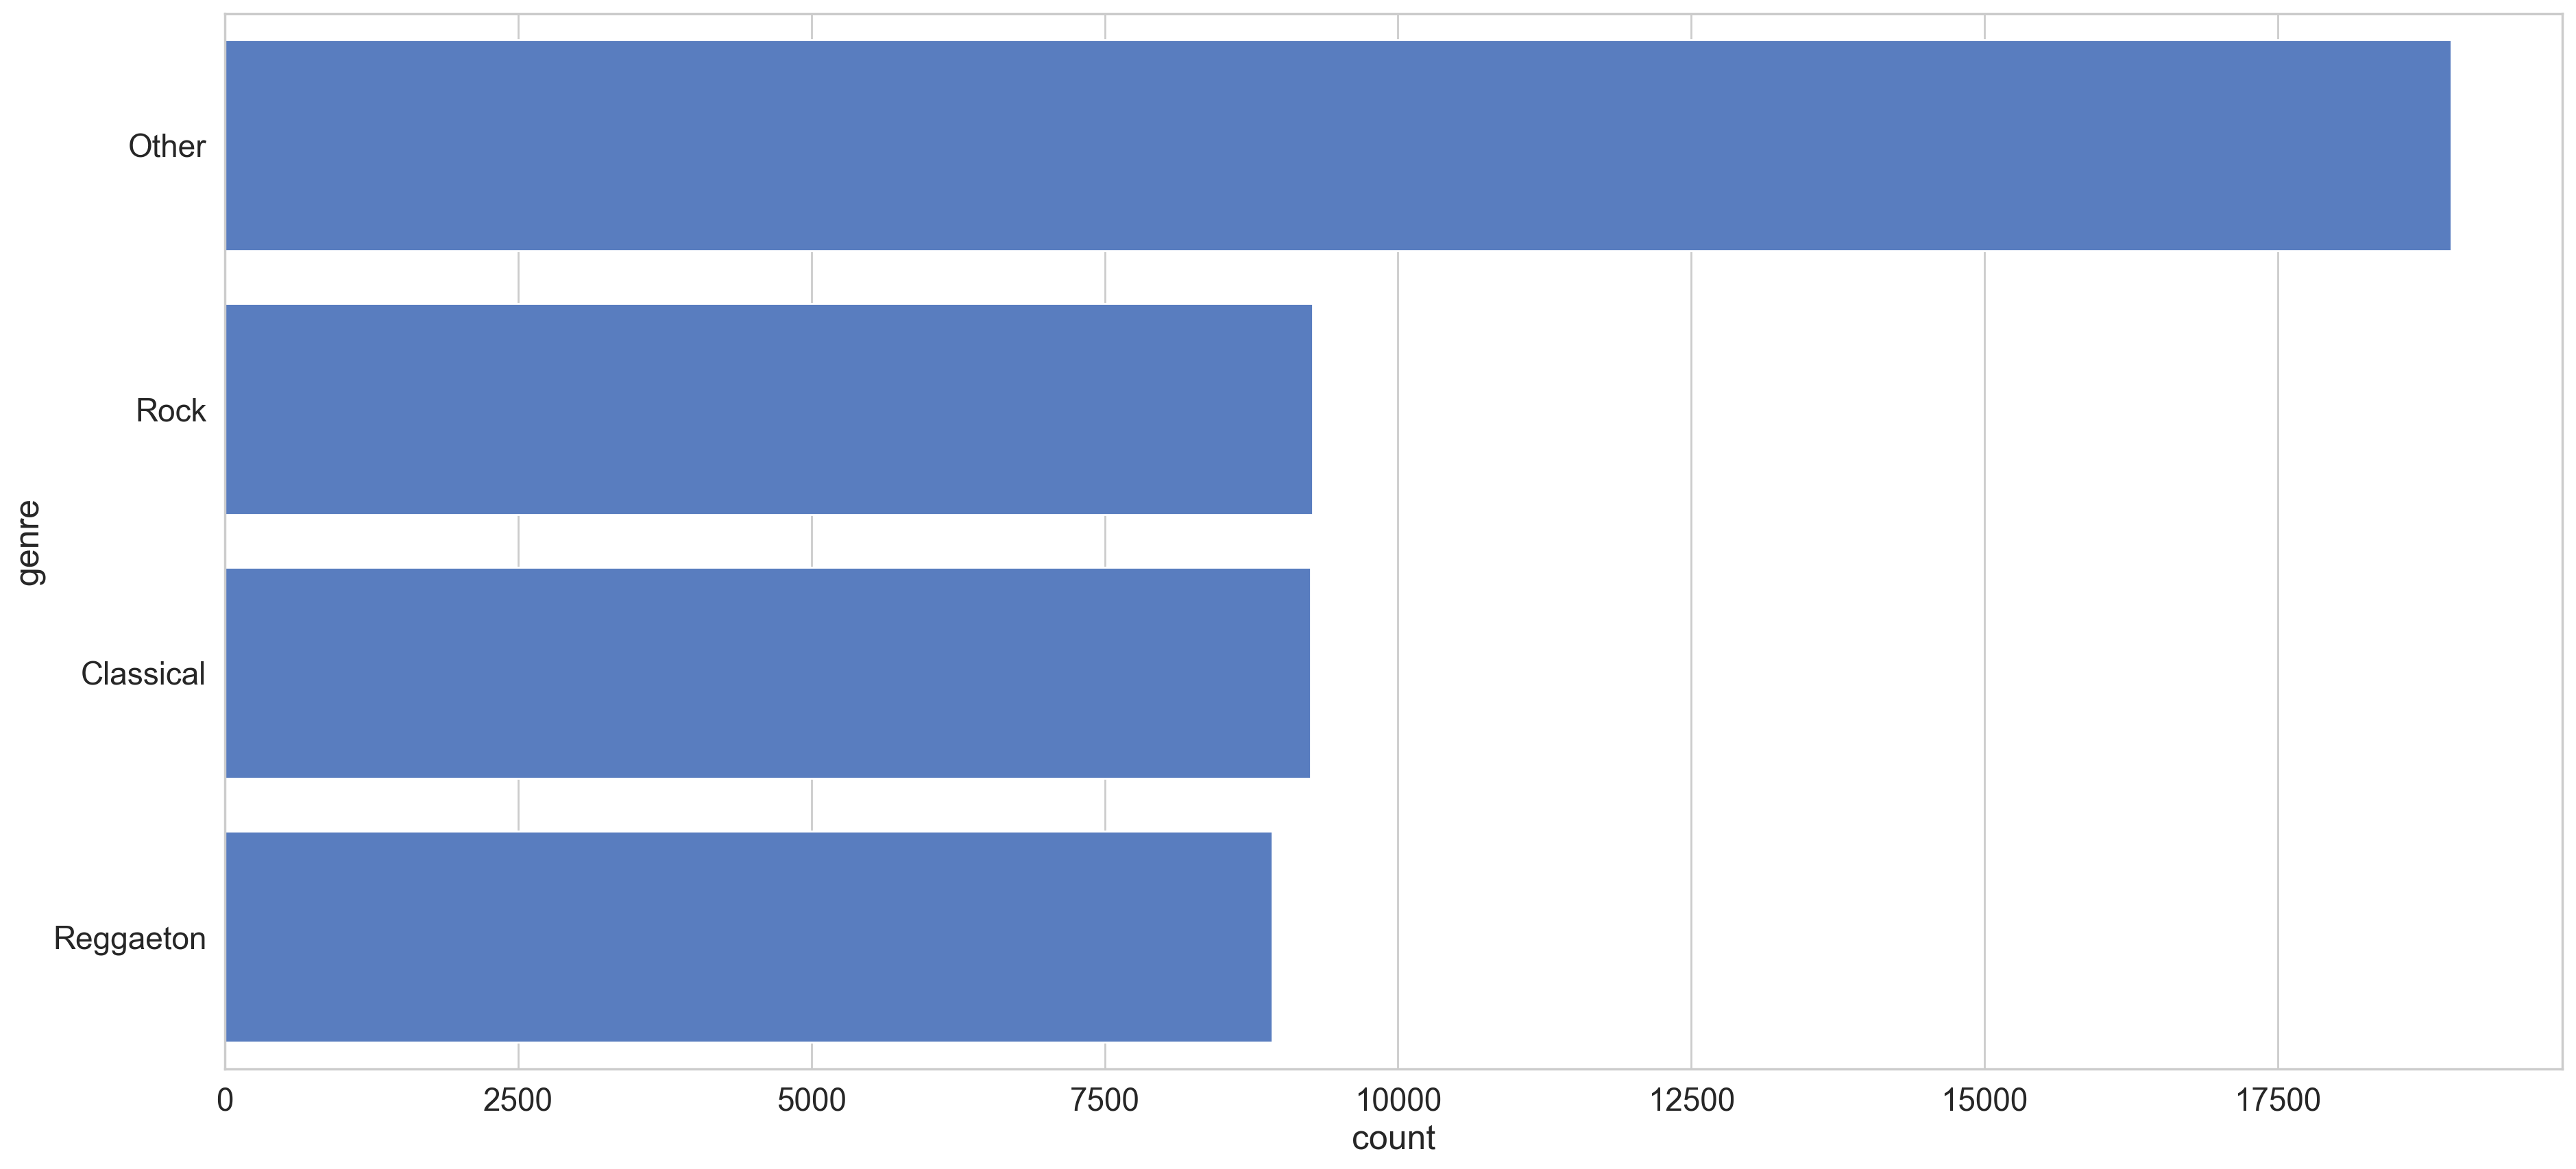

In [587]:
sns.countplot(y='genre', data=df, order=df['genre'].value_counts().index)


In [588]:
# genres = [
#  'Hip-Hop',
#  'Jazz',
#  'Soundtrack',
#  'Comedy',
#  'Reggaeton',
#  'Rock'
#  ]
genres = [
    'Classical',
    'Reggaeton',
    'Rock',
    'Others',
]
# df = df[df.genre.isin(genres)]
display(df)

,genre,acousticness,danceability,energy,liveness,loudness,speechiness,tempo,valence
66607,Other,0.14900,0.837,0.364,0.2710,-11.713,0.2760,123.984,0.463
66608,Other,0.25900,0.889,0.496,0.2520,-6.365,0.0905,86.003,0.544
66609,Other,0.03950,0.837,0.636,0.3420,-7.643,0.0860,145.972,0.274
66610,Other,0.00195,0.942,0.383,0.0922,-8.099,0.5650,100.021,0.380
66611,Other,0.19400,0.729,0.625,0.2480,-5.266,0.0315,146.034,0.261
...,...,...,...,...,...,...,...,...,...
226503,Rock,0.67000,0.718,0.593,0.1720,-9.976,0.0377,124.251,0.869
226504,Rock,0.03400,0.521,0.933,0.3300,-4.874,0.1790,169.842,0.607
226505,Rock,0.67100,0.618,0.769,0.2760,-4.642,0.0309,111.978,0.607
226506,Rock,0.05430,0.681,0.662,0.2060,-6.526,0.1150,149.485,0.850


In [589]:
display(genres.__len__())

4

In [590]:
def plot_activity(gen, df):
    data = df[df['genre'] == gen][['acousticness','danceability','energy','liveness','loudness','speechiness', 'tempo',	'valence']][:200]
    axis = data.plot(subplots=True, figsize=(16, 12),
                     title=gen)
    for ax in axis:
        ax.legend(loc='lower left', bbox_to_anchor=(1.0, 0.5))

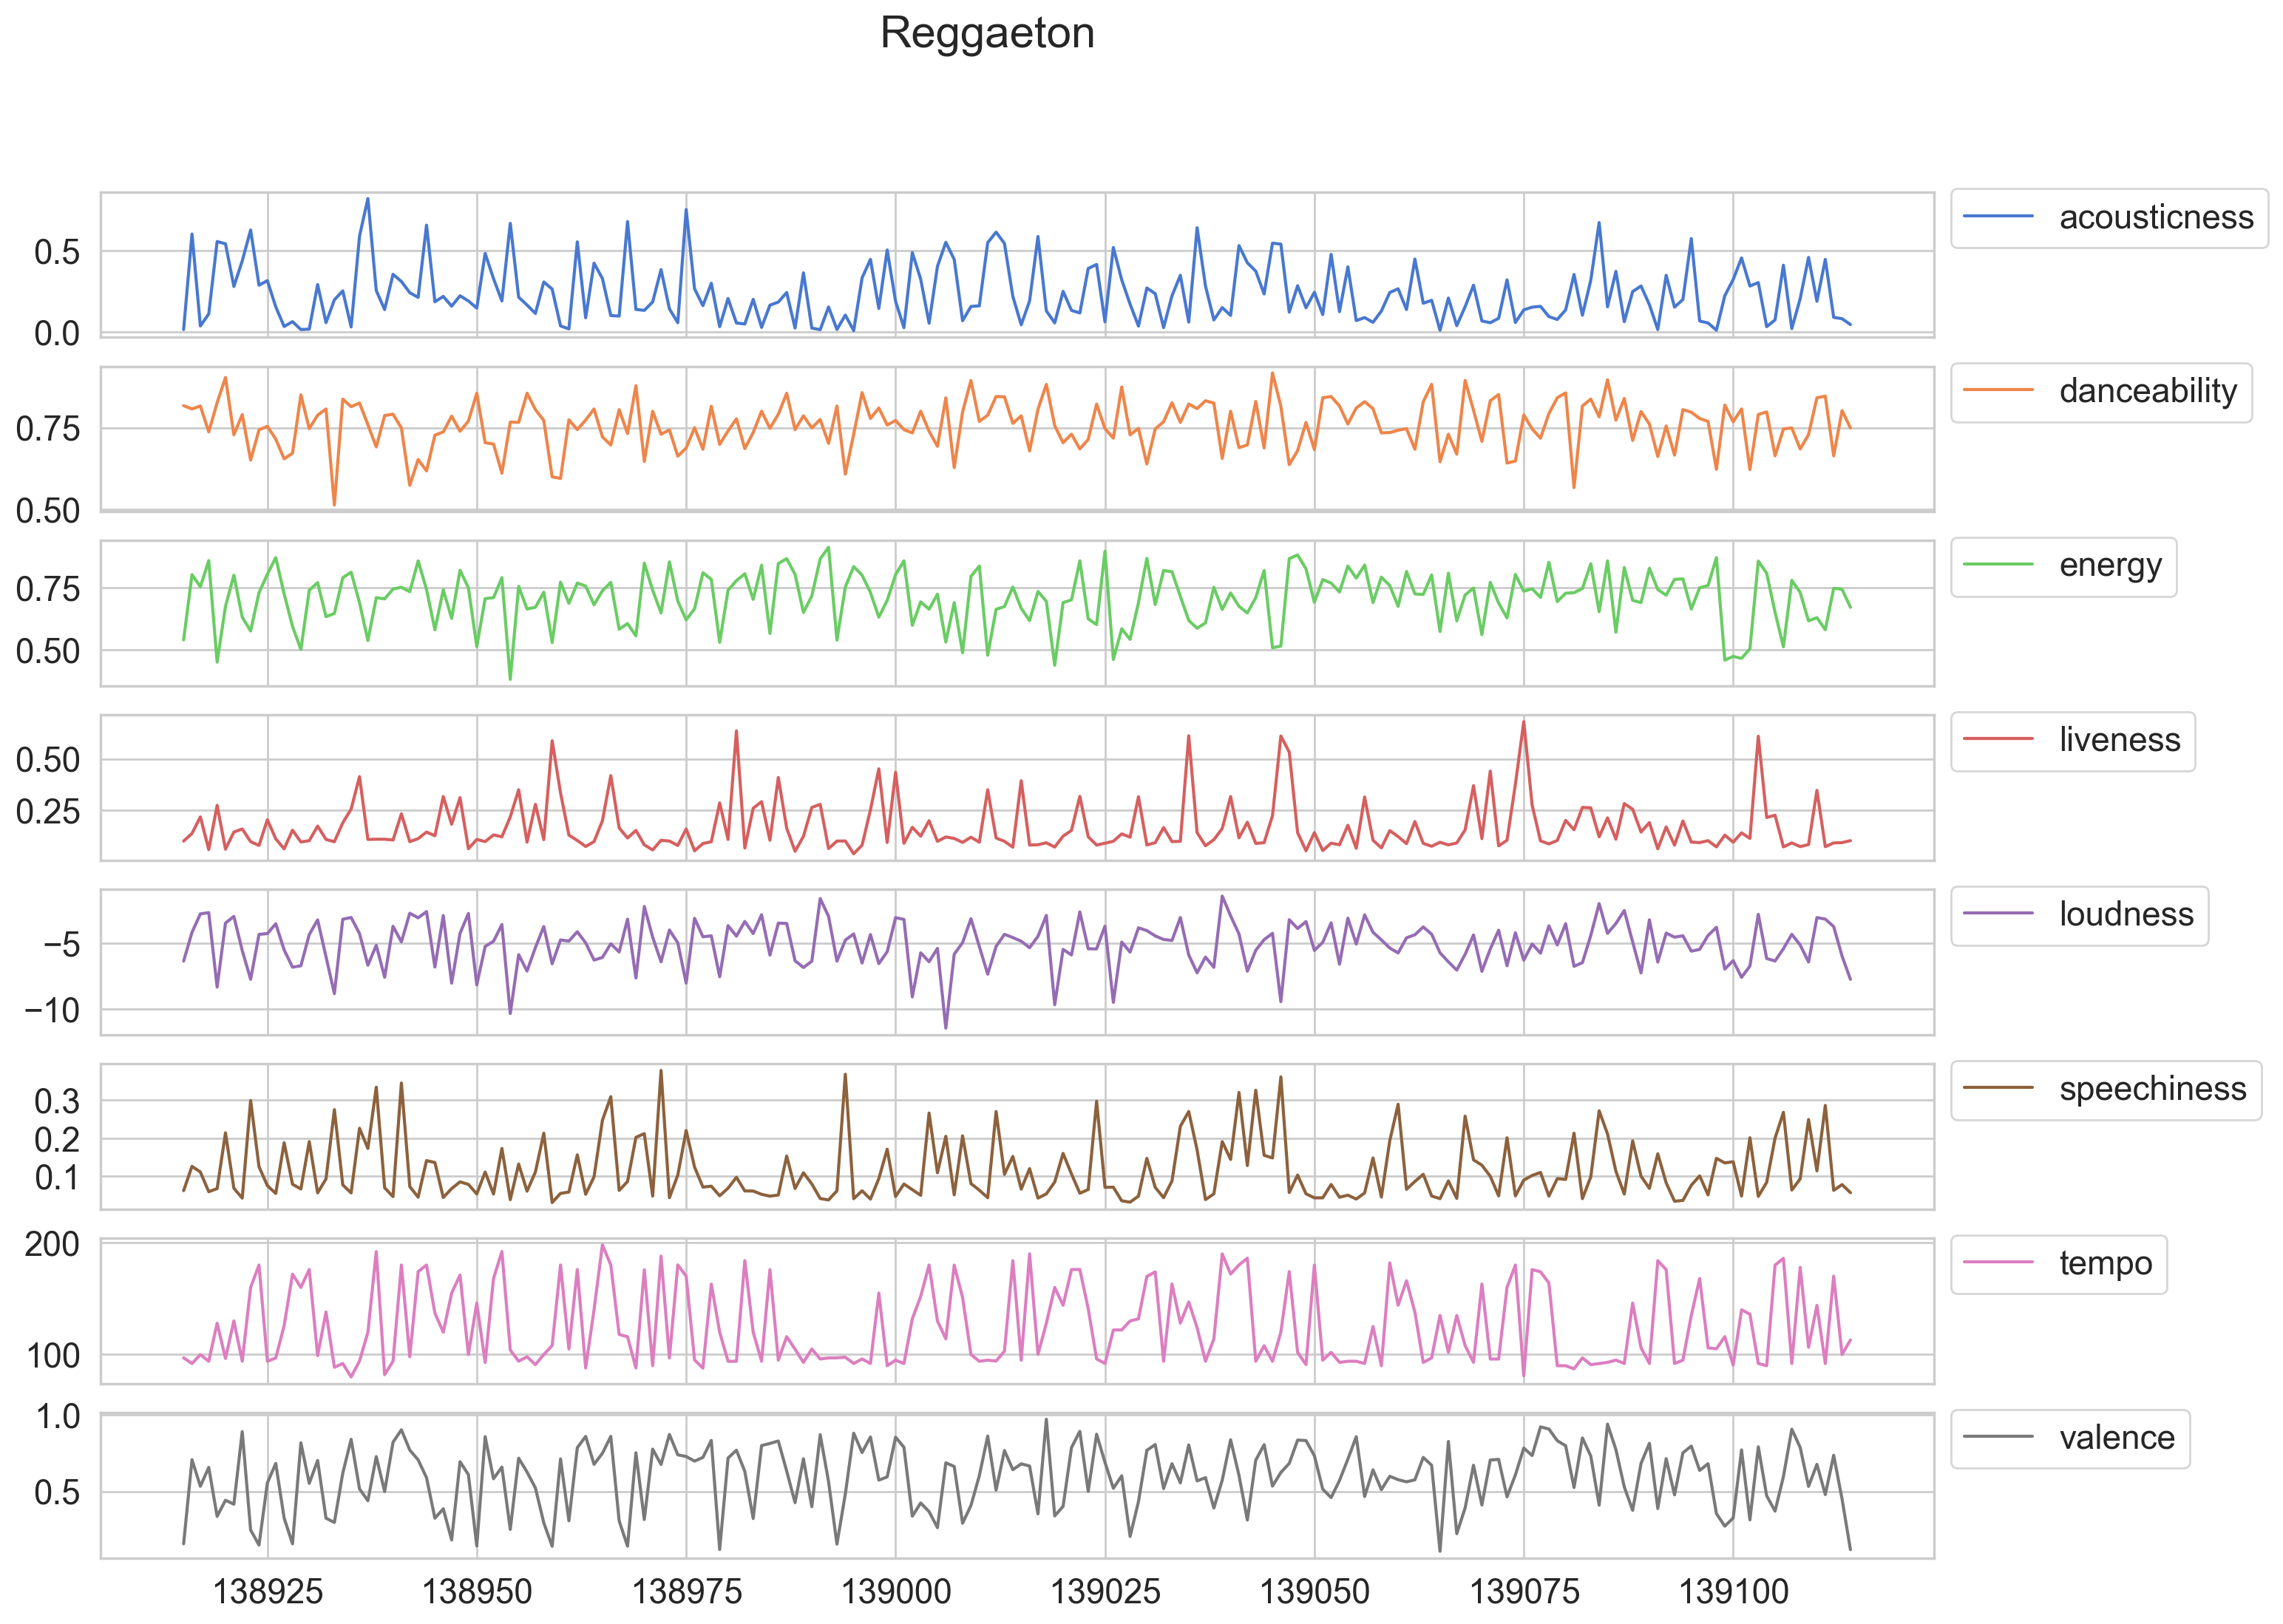

In [613]:
# plot_activity('Classical', df)
# plot_activity('Rock', df)
plot_activity('Reggaeton', df)
# plot_activity('Others', df)


# plot_activity('Anime', df)
# plot_activity('Soundtrack', df)
# plot_activity('World', df)

In [592]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df,test_size=0.2, random_state=42)

train_features,train_labels = train[['acousticness','danceability','energy','liveness','loudness','speechiness', 'tempo',	'valence']],train['genre']
test_features,test_labels = test[['acousticness','danceability','energy','liveness','loudness','speechiness', 'tempo',	'valence']],test['genre']


In [593]:
display(type(test_features))
display(test_features)

pandas.core.frame.DataFrame

,acousticness,danceability,energy,liveness,loudness,speechiness,tempo,valence
162208,0.69200,0.752,0.732,0.0816,-6.323,0.0334,134.025,0.945
67171,0.04140,0.686,0.428,0.1380,-13.072,0.1920,141.950,0.329
69850,0.36000,0.529,0.809,0.2420,-6.554,0.2690,125.285,0.136
90417,0.39900,0.804,0.555,0.1020,-6.038,0.2760,91.975,0.516
155566,0.01440,0.628,0.706,0.0747,-5.342,0.0286,79.985,0.473
...,...,...,...,...,...,...,...,...
173861,0.83800,0.523,0.857,0.4810,-7.489,0.9070,84.418,0.647
225177,0.72300,0.521,0.516,0.2570,-7.456,0.0369,136.483,0.569
104028,0.00176,0.113,0.951,0.3340,-4.743,0.1290,200.024,0.139
154123,0.00629,0.603,0.825,0.1360,-3.587,0.0288,96.028,0.415


In [594]:
train_labels.shape

(37144,)

In [595]:
test_features.shape

(9287, 8)

In [596]:
train_features = train_features.astype('float32')
test_features = test_features.astype('float32')

from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
train_labels_encoded = label_encoder.fit_transform(train_labels)
test_labels_encoded = label_encoder.transform(test_labels)


In [597]:
display(list(set(test_labels_encoded)))

[0, 1, 2, 3]

In [598]:
model = keras.Sequential()


model.add(tf.keras.layers.Dense(100, activation='relu', input_shape=(8,)))
model.add(tf.keras.layers.Dense(100, activation='relu'))
model.add(tf.keras.layers.Dense(100,activation='relu'))
model.add(tf.keras.layers.Dense(4, activation='softmax'))

model.compile(optimizer='adam',
             loss = 'sparse_categorical_crossentropy',
             metrics=['accuracy'])

c:\Users\Jadge\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [599]:
history = model.fit(
    train_features, train_labels_encoded,
    epochs=20,
    batch_size=50,
    validation_split=0.2,
    shuffle=True
)


Epoch 1/20


595/595 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.4959 - loss: 1.4257 - val_accuracy: 0.6176 - val_loss: 0.8102
Epoch 2/20
595/595 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6754 - loss: 0.7175 - val_accuracy: 0.6631 - val_loss: 0.6981
Epoch 3/20
595/595 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7324 - loss: 0.6246 - val_accuracy: 0.7654 - val_loss: 0.5750
Epoch 4/20
595/595 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7547 - loss: 0.5742 - val_accuracy: 0.7550 - val_loss: 0.5751
Epoch 5/20
595/595 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7668 - loss: 0.5542 - val_accuracy: 0.7535 - val_loss: 0.5798
Epoch 6/20
595/595 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7713 - loss: 0.5407 - val_accuracy: 0.7167 - val_loss: 0.6346
Epoch 7/20
595/595 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7714 - loss: 0.5374 - val_accuracy: 0.7356 - val_loss: 0.5988
Epoch 8/20
595/595 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7755 - loss: 0.5297 - val_accuracy: 0.7410 - val_

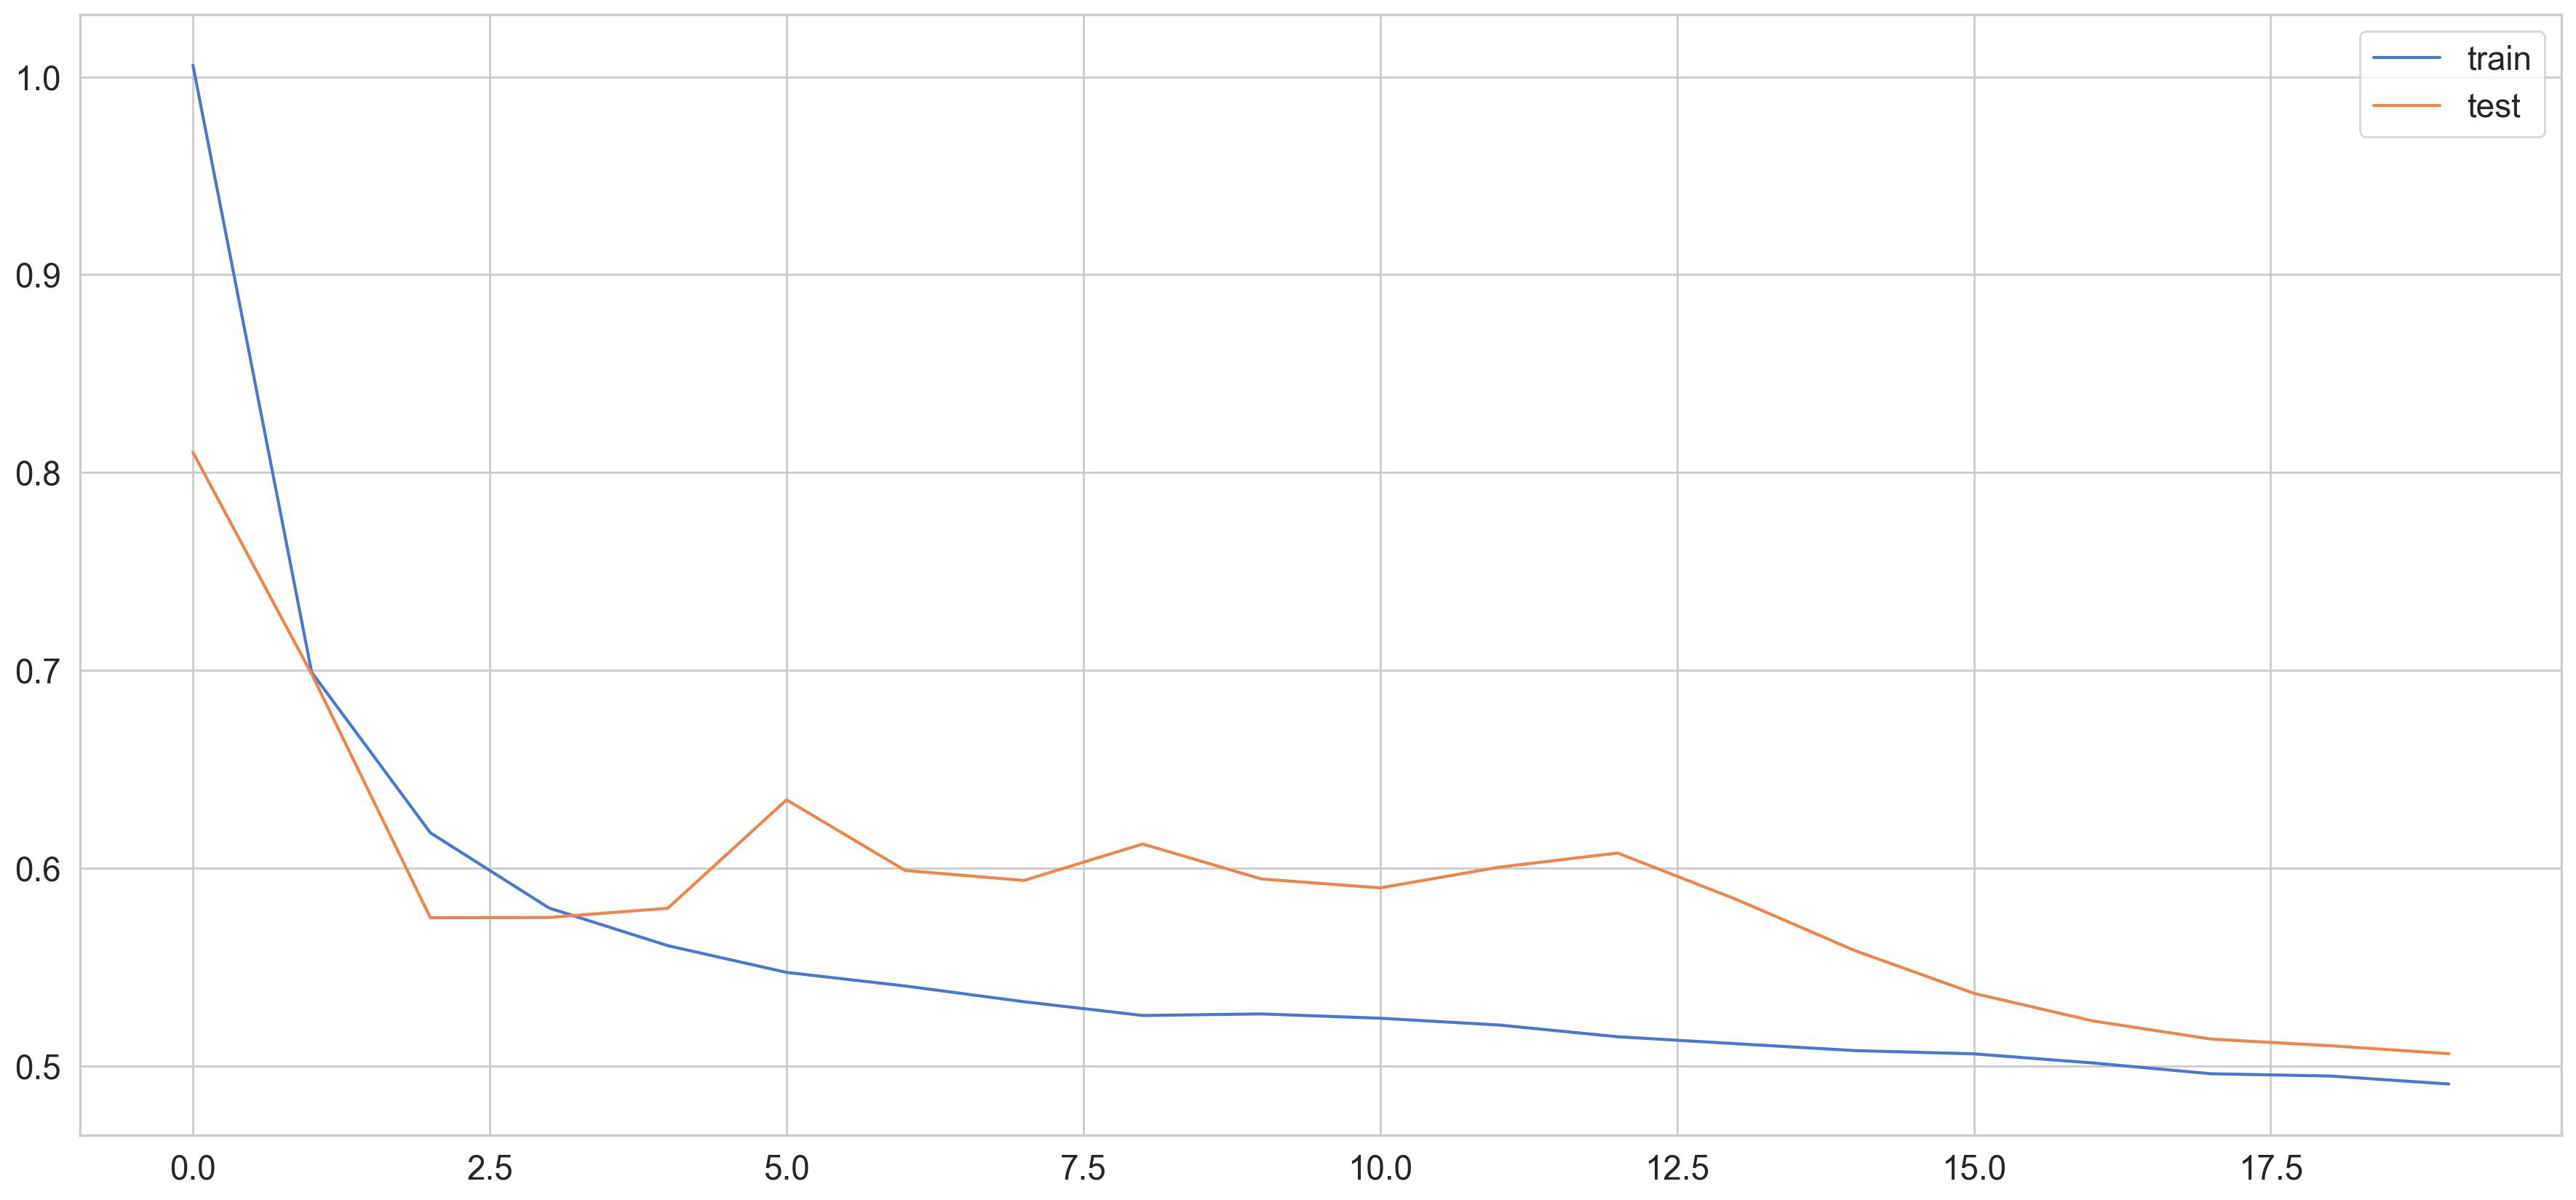

In [600]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend();

In [601]:
test_loss, test_acc = model.evaluate(test_features,test_labels_encoded,verbose=2)

291/291 - 0s - 2ms/step - accuracy: 0.7868 - loss: 0.5097


In [602]:
predictions = model.predict(test_features)

291/291 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [603]:
predicts = pd.DataFrame(predictions)

In [604]:
predicts.columns = genres
predict = []
for pred in predictions:
    predict.append(np.argmax(pred))


predicts['Label'] = predict

In [605]:
predicts['Real'] = list(test_labels_encoded.copy())
predicts['Value'] = list(label_encoder.inverse_transform(test_labels_encoded))

In [606]:
pd.set_option('display.max_columns', None)
print(predicts)

      Classical  Reggaeton      Rock    Others  Label  Real      Value
0      0.001320   0.182797  0.589855  0.226028      2     2  Reggaeton
1      0.001160   0.810269  0.137207  0.051364      1     1      Other
2      0.002174   0.716780  0.232712  0.048334      1     1      Other
3      0.000135   0.699006  0.291752  0.009107      1     1      Other
4      0.005779   0.127271  0.388595  0.478356      3     3       Rock
...         ...        ...       ...       ...    ...   ...        ...
9282   0.000170   0.995389  0.004427  0.000014      1     1      Other
9283   0.034104   0.262612  0.183262  0.520022      3     3       Rock
9284   0.462304   0.014328  0.006058  0.517310      3     0  Classical
9285   0.031624   0.130022  0.176826  0.661528      3     3       Rock
9286   0.000023   0.995849  0.004126  0.000003      1     1      Other

[9287 rows x 7 columns]


In [607]:
from sklearn.metrics import confusion_matrix, classification_report
cf_matrix = confusion_matrix(list(test_labels_encoded.copy()),predict)

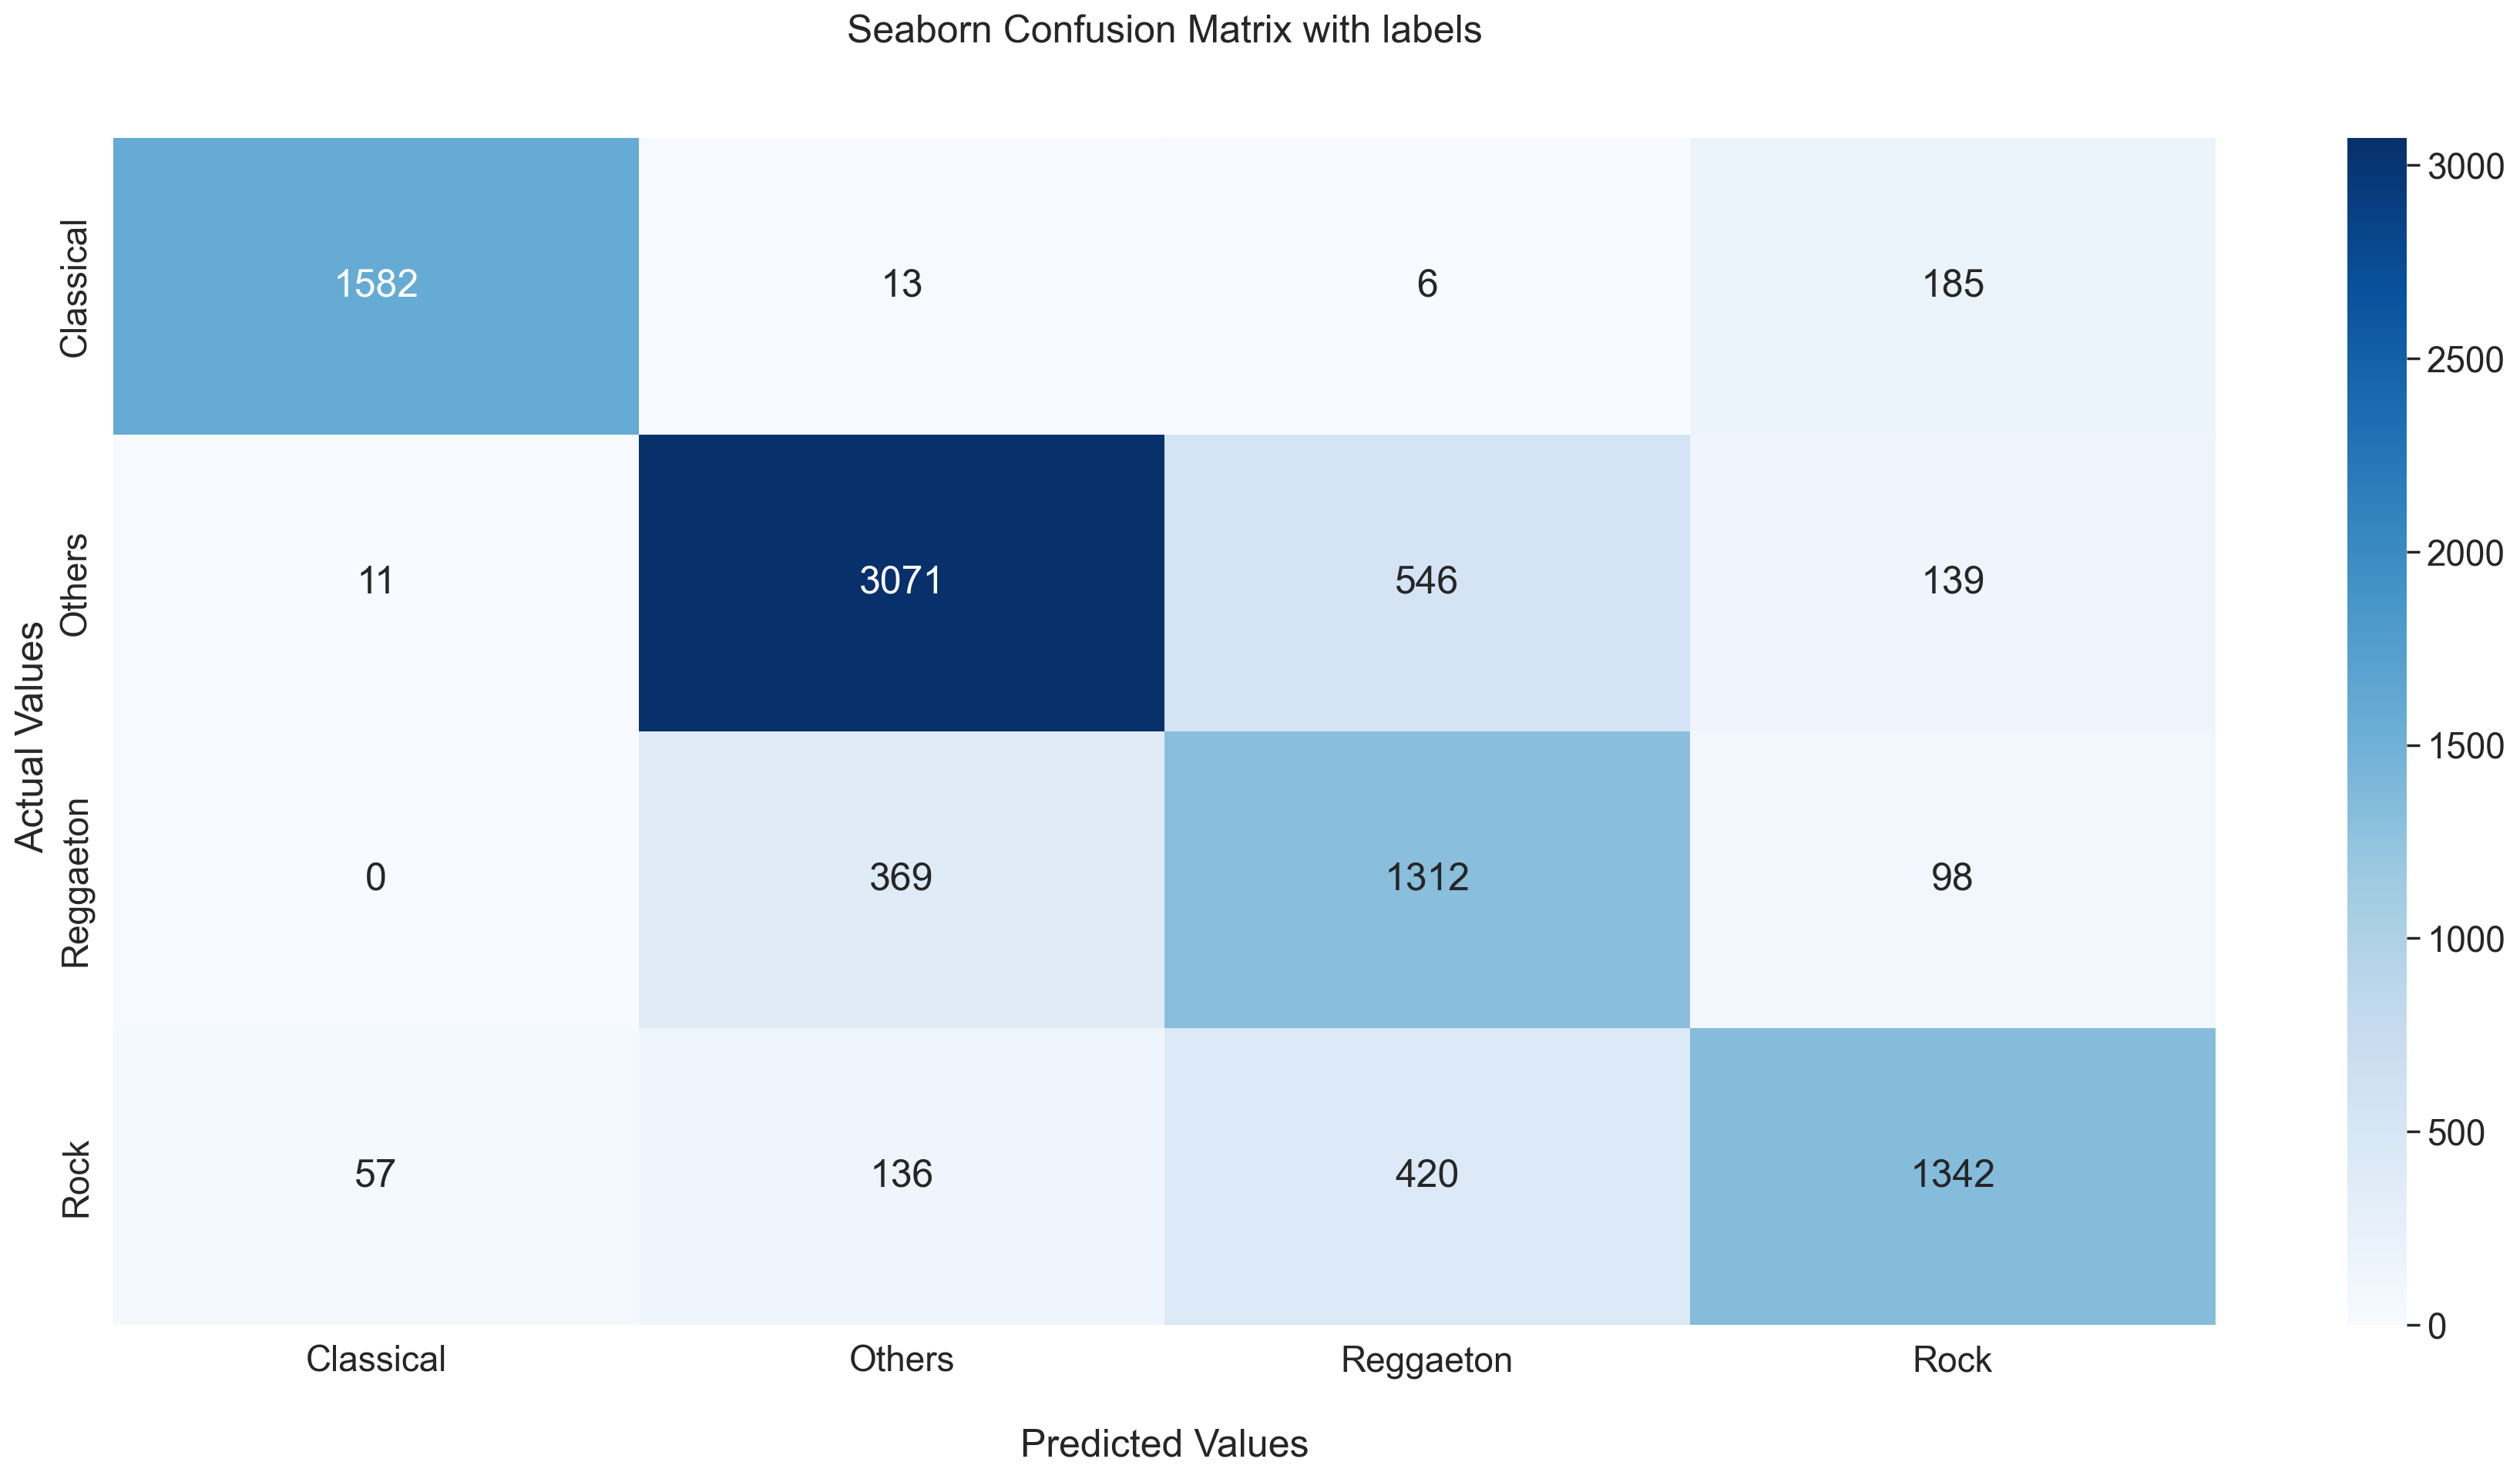

In [608]:
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues',fmt='d')

ax.set_title('Seaborn Confusion Matrix with labels\n\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels([
    'Classical',
    'Others',
    'Reggaeton',
    'Rock',
    
])
ax.yaxis.set_ticklabels([
    'Classical',
    'Others',
    'Reggaeton',
    'Rock',
])

## Display the visualization of the Confusion Matrix.
plt.show()

In [609]:
%pip install streamlit

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [610]:
import pickle
with open('music_genre_classifier.pkl', 'wb') as f:
    pickle.dump(model, f)

In [611]:
model.save("music_genre_classifier.h5")